<a href="https://colab.research.google.com/github/YashMajithia/NFL-Big-Data-Bowl-2024/blob/main/NFL_Big_Data_Bowl_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#importing the dataset
!wget -O data.zip "https://www.dropbox.com/scl/fo/wgewoj13de1w0mttdo2bz/AOuaHMnQRvC1b-qi6iKzCG8?rlkey=1cyytae1u2uxcnopf557nsw3f&st=6trusnlx&dl=1"
!unzip data.zip -d data/

--2025-11-11 14:22:32--  https://www.dropbox.com/scl/fo/wgewoj13de1w0mttdo2bz/AOuaHMnQRvC1b-qi6iKzCG8?rlkey=1cyytae1u2uxcnopf557nsw3f&st=6trusnlx&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0313459ccf141a77c3600a61e2.dl.dropboxusercontent.com/zip_download_get/CYXCyBfJfoViw4jXaQJS-b9niED0Txqd0OoG7WsA7XwBqjodl8GC75v_msiuvFi3DePgEbU0Bb5wrZpvA0J4tTip6hWgmLwkZpmAqwk1tGbF0Q# [following]
--2025-11-11 14:22:33--  https://uc0313459ccf141a77c3600a61e2.dl.dropboxusercontent.com/zip_download_get/CYXCyBfJfoViw4jXaQJS-b9niED0Txqd0OoG7WsA7XwBqjodl8GC75v_msiuvFi3DePgEbU0Bb5wrZpvA0J4tTip6hWgmLwkZpmAqwk1tGbF0Q
Resolving uc0313459ccf141a77c3600a61e2.dl.dropboxusercontent.com (uc0313459ccf141a77c3600a61e2.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6017:15::a27d:20f
Connecting to uc0313459ccf141a77c36

In [3]:
#importing the csvs from dataset
games = pd.read_csv('/content/data/games.csv')
players = pd.read_csv('/content/data/players.csv')
plays = pd.read_csv('/content/data/plays.csv')
tackles = pd.read_csv('/content/data/tackles.csv')
week1 = pd.read_csv('/content/data/tracking_week_1.csv')
week2 = pd.read_csv('/content/data/tracking_week_2.csv')
week3 = pd.read_csv('/content/data/tracking_week_3.csv')
week4 = pd.read_csv('/content/data/tracking_week_4.csv')
week5 = pd.read_csv('/content/data/tracking_week_5.csv')
week6 = pd.read_csv('/content/data/tracking_week_6.csv')
week7 = pd.read_csv('/content/data/tracking_week_7.csv')
week8 = pd.read_csv('/content/data/tracking_week_8.csv')
week9 = pd.read_csv('/content/data/tracking_week_9.csv')

## **General heads up over games data**

In [4]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09-08-2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09-11-2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09-11-2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09-11-2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09-11-2022,13:00:00,CIN,PIT,20,23


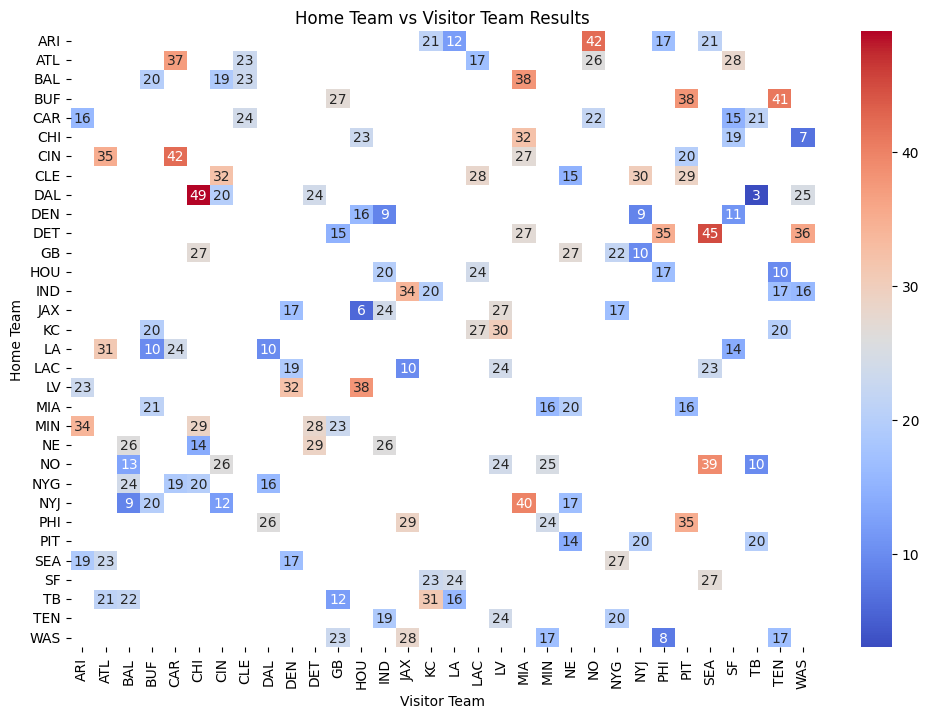

In [5]:
#visualising home team vs away team results, who won more where!

pivot_table = games.pivot_table(index='homeTeamAbbr', columns='visitorTeamAbbr', values='homeFinalScore', aggfunc='sum')

plt.figure(figsize = (12,8))
sns.heatmap(pivot_table, annot=True, cmap= 'coolwarm')
plt.title("Home Team vs Visitor Team Results")
plt.xlabel('Visitor Team')
plt.ylabel('Home Team')
plt.show()

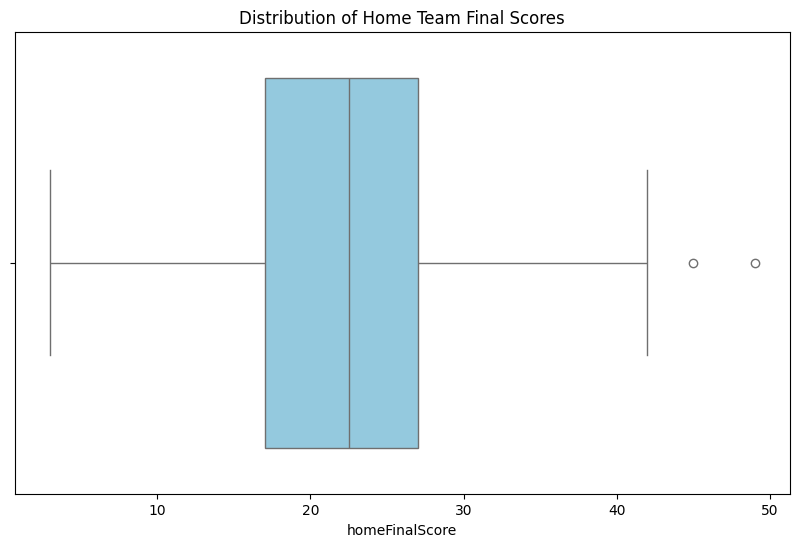

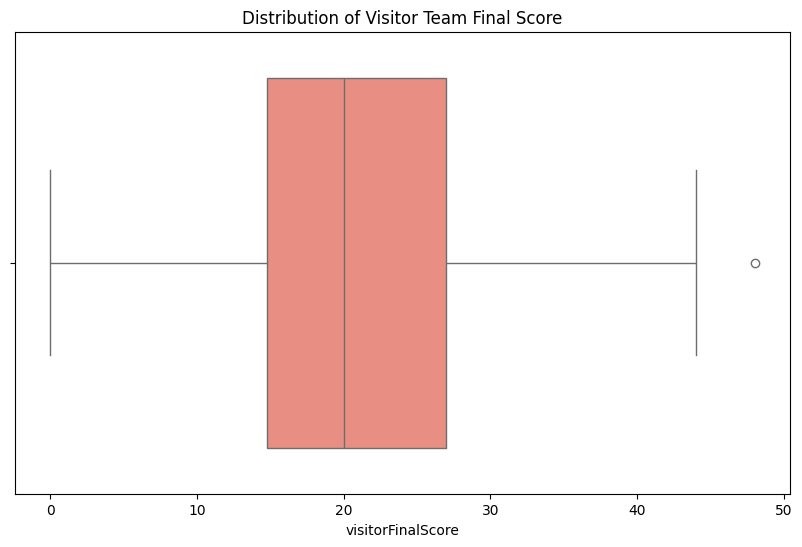

In [6]:
#score distribution

plt.figure(figsize = (10,6))
sns.boxplot(x="homeFinalScore", data=games, color='skyblue')
plt.title('Distribution of Home Team Final Scores')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='visitorFinalScore', data=games, color='salmon')
plt.title("Distribution of Visitor Team Final Score")
plt.show()

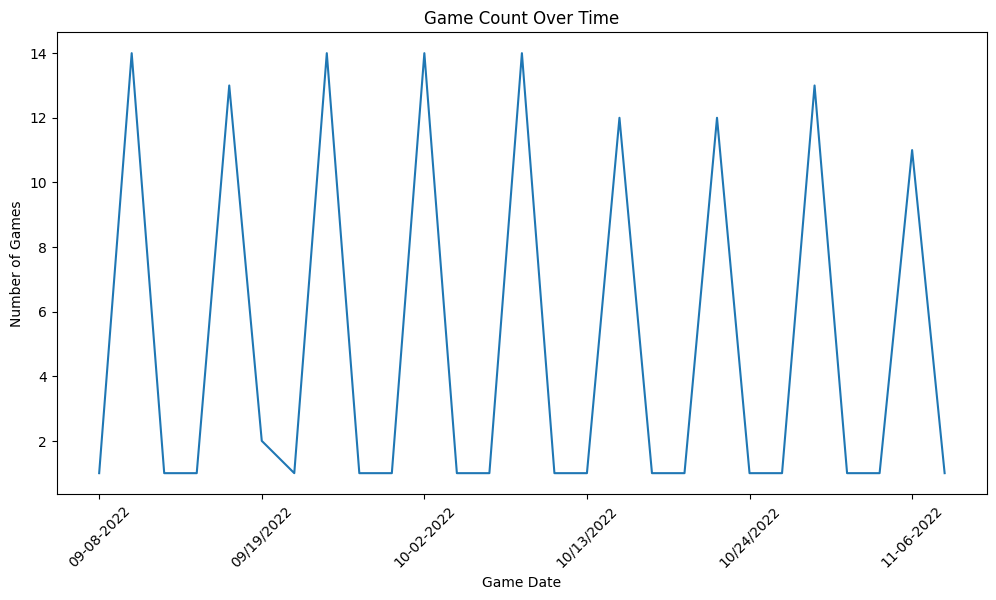

In [7]:
#trends in game counts over time
game_date_counts= games.groupby('gameDate').size()

plt.figure(figsize=(12,6))
game_date_counts.plot(kind='line')
plt.title("Game Count Over Time")
plt.xlabel('Game Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

## **General heads up over player's data**

In [14]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,25511,06-Apr,225,1977-08-03,Michigan,QB,Tom Brady,48.0
1,29550,06-Apr,328,1982-01-22,Arkansas,T,Jason Peters,43.0
2,29851,06-Feb,225,1983-12-02,California,QB,Aaron Rodgers,41.0
3,30842,06-Jun,267,1984-05-19,UCLA,TE,Marcedes Lewis,41.0
4,33084,06-Apr,217,1985-05-17,Boston College,QB,Matt Ryan,40.0


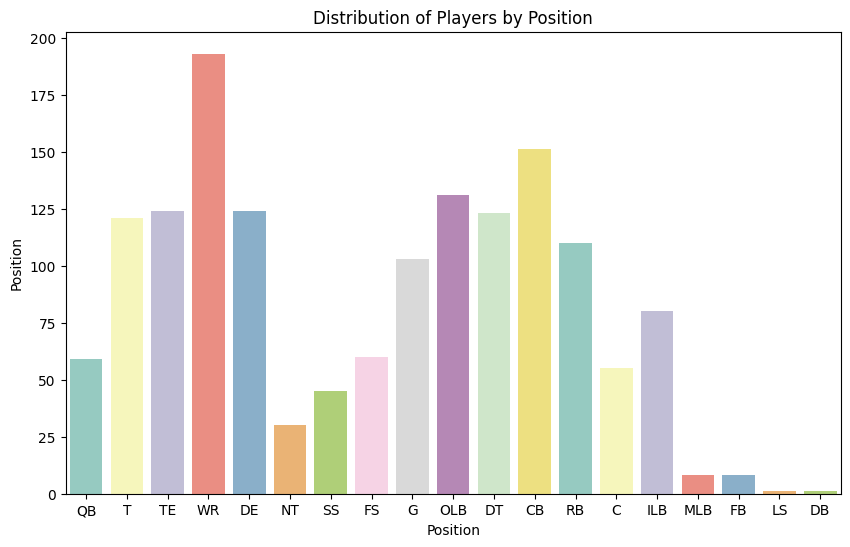

In [15]:
#distribution of player position
plt.figure(figsize=(10,6))
sns.countplot(data=players,x='position',palette='Set3')
plt.title('Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Position')
plt.show()

anomaly: height of the players in dataset is given wrong, 06-Apr this is not height

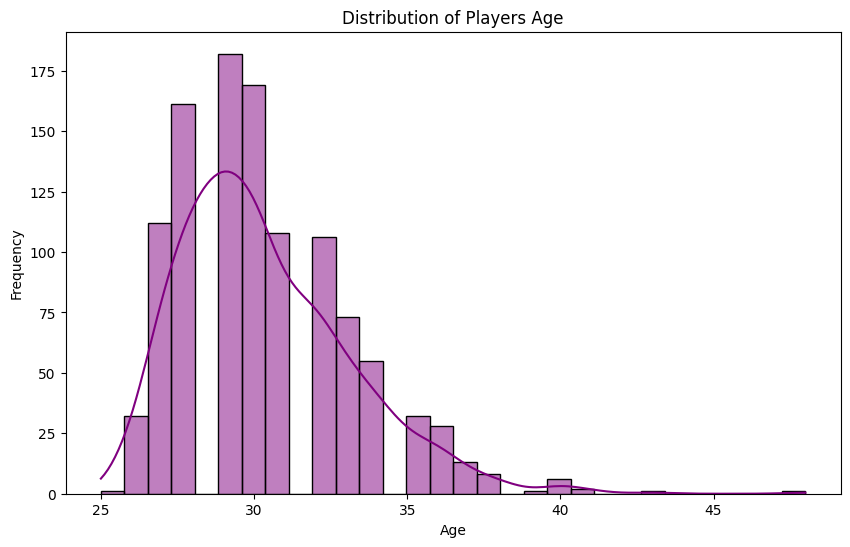

In [16]:
players['birthDate'] = pd.to_datetime(players['birthDate'], format='mixed', dayfirst=True)
today = pd.to_datetime('today')
players['age'] = today.year - players['birthDate'].dt.year
players.loc[today.month < players['birthDate'].dt.month, 'age'] -= 1
players.loc[(today.month == players['birthDate'].dt.month) & (today.day < players['birthDate'].dt.day), 'age'] -= 1

plt.figure(figsize=(10,6))
sns.histplot(data=players,x='age',kde=True,color='purple')
plt.title('Distribution of Players Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

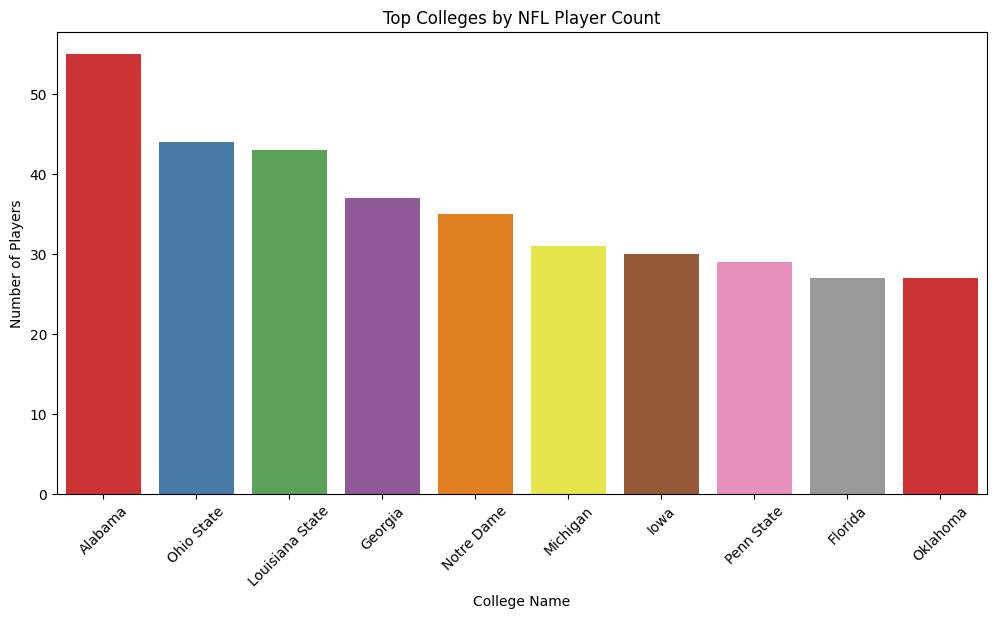

In [17]:
#colleges with most player count
top_colleges=players['collegeName'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_colleges.index, y=top_colleges.values, palette='Set1')
plt.title("Top Colleges by NFL Player Count")
plt.xlabel("College Name")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

## **Tackling analysis**

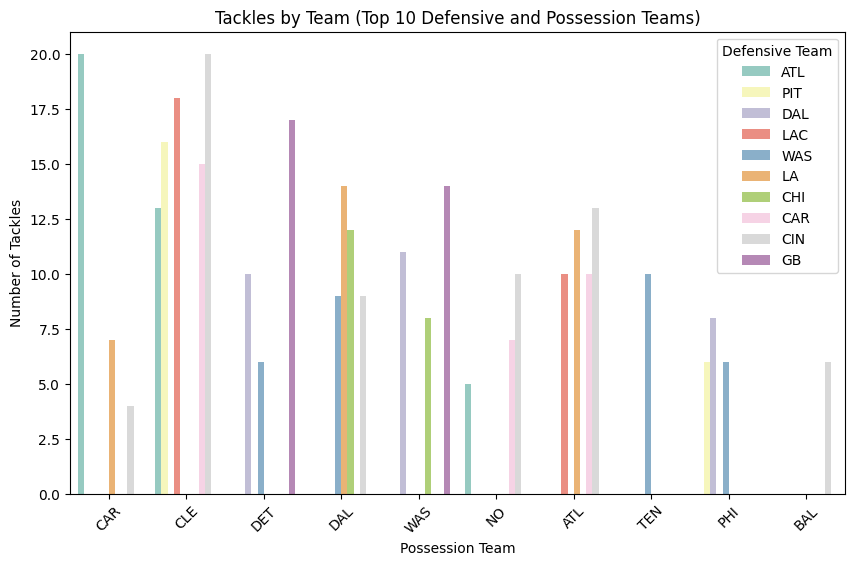

In [18]:
#tackles by position
tackling_plays = plays[plays['playDescription'].str.contains('tackle', case=False)]

top_defensive_teams = tackling_plays['defensiveTeam'].value_counts().head(10).index

top_possession_teams = tackling_plays['possessionTeam'].value_counts().head(10).index

filtered_tackling_plays = tackling_plays[
    (tackling_plays['defensiveTeam'].isin(top_defensive_teams)) &
    (tackling_plays['possessionTeam'].isin(top_possession_teams))
]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_tackling_plays, x='possessionTeam', hue='defensiveTeam', palette='Set3')
plt.title("Tackles by Team (Top 10 Defensive and Possession Teams)")
plt.xlabel("Possession Team")
plt.ylabel("Number of Tackles")
plt.xticks(rotation=45)

ax.legend(title="Defensive Team", loc='upper right')

plt.show()

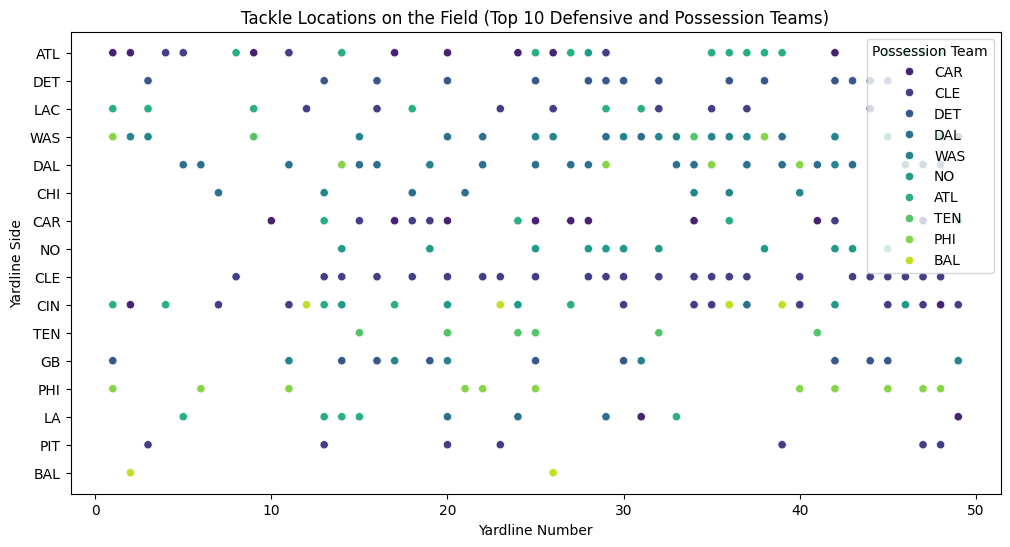

In [19]:
#tackle location

top_defensive_teams = tackling_plays['defensiveTeam'].value_counts().head(10).index

top_possession_teams = tackling_plays['possessionTeam'].value_counts().head(10).index

filtered_tackling_plays = tackling_plays[
    (tackling_plays['defensiveTeam'].isin(top_defensive_teams)) &
    (tackling_plays['possessionTeam'].isin(top_possession_teams))
]

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='yardlineNumber', y='yardlineSide', data=filtered_tackling_plays, hue='possessionTeam', palette='viridis')
plt.title("Tackle Locations on the Field (Top 10 Defensive and Possession Teams)")
plt.xlabel("Yardline Number")
plt.ylabel("Yardline Side")

ax.legend(title="Possession Team", loc='upper right')

plt.show()

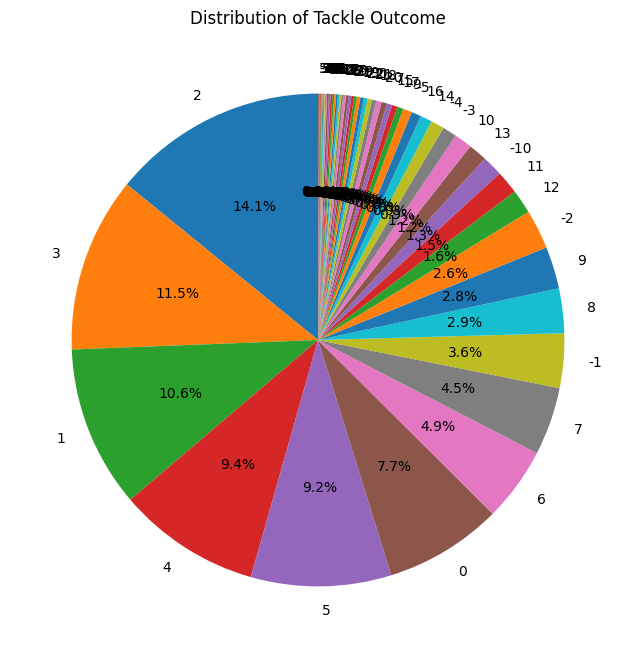

In [20]:
#tackle outcome
plt.figure(figsize=(10,8))
tackling_plays['playResult'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Tackle Outcome')
plt.ylabel('')
plt.show()

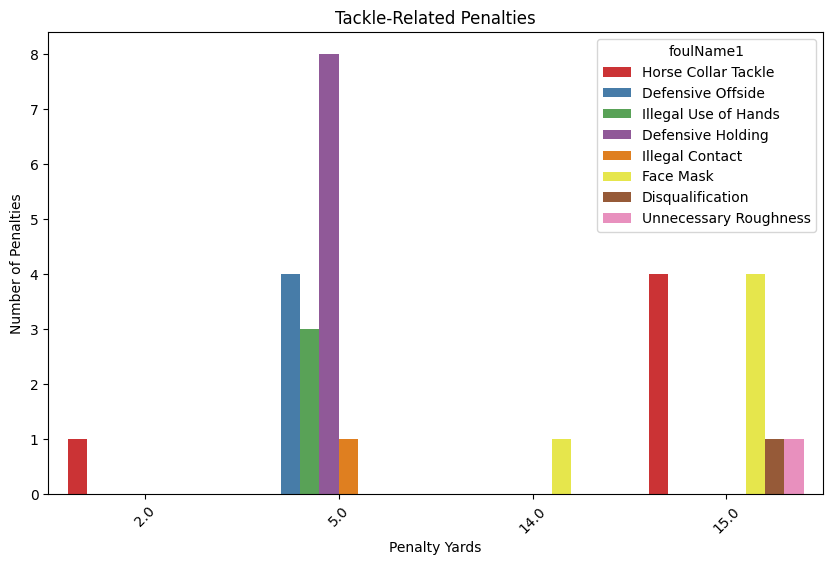

In [21]:
#tackle related penalties
penalties = tackling_plays[tackling_plays['penaltyYards']> 0]

plt.figure(figsize=(10,6))
sns.countplot(data=penalties, x='penaltyYards', hue='foulName1', palette='Set1')
plt.title("Tackle-Related Penalties")
plt.xlabel("Penalty Yards")
plt.ylabel("Number of Penalties")
plt.xticks(rotation=45)
plt.show()

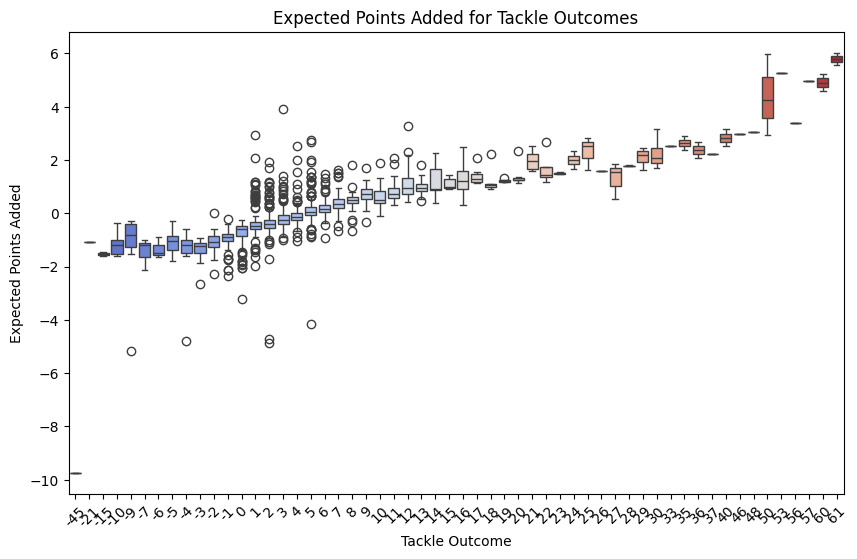

In [22]:
#epa (expected points added)
plt.figure(figsize=(10,6))
sns.boxplot(data=tackling_plays,x="playResult",y='expectedPointsAdded',palette='coolwarm')
plt.title("Expected Points Added for Tackle Outcomes")
plt.xlabel("Tackle Outcome")
plt.ylabel("Expected Points Added")
plt.xticks(rotation=45)
plt.show()

## **Analysing Tackles data**

In [23]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


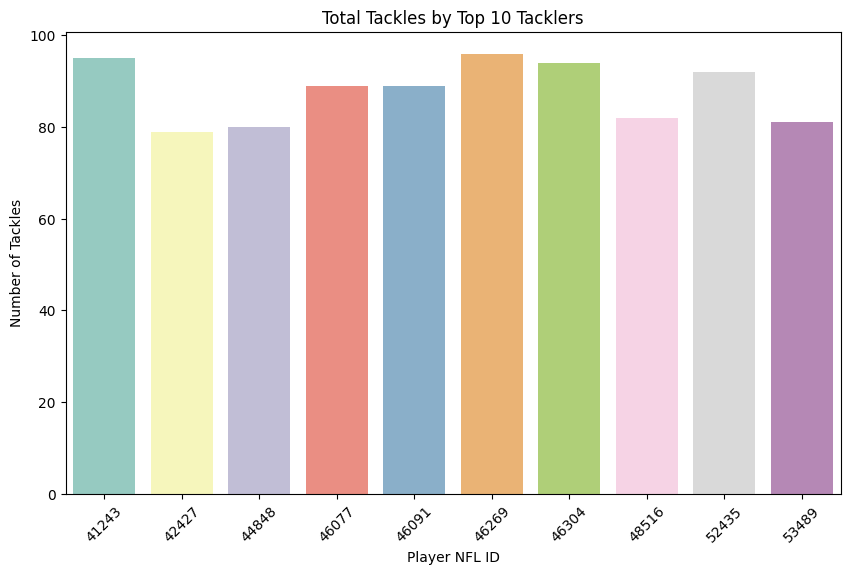

In [24]:
#total tackles by players

top_tacklers = tackles['nflId'].value_counts().head(10).index

top_tackles = tackles[tackles['nflId'].isin(top_tacklers)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_tackles, x='nflId', palette='Set3')
plt.title("Total Tackles by Top 10 Tacklers")
plt.xlabel("Player NFL ID")
plt.ylabel("Number of Tackles")
plt.xticks(rotation=45)
plt.show()


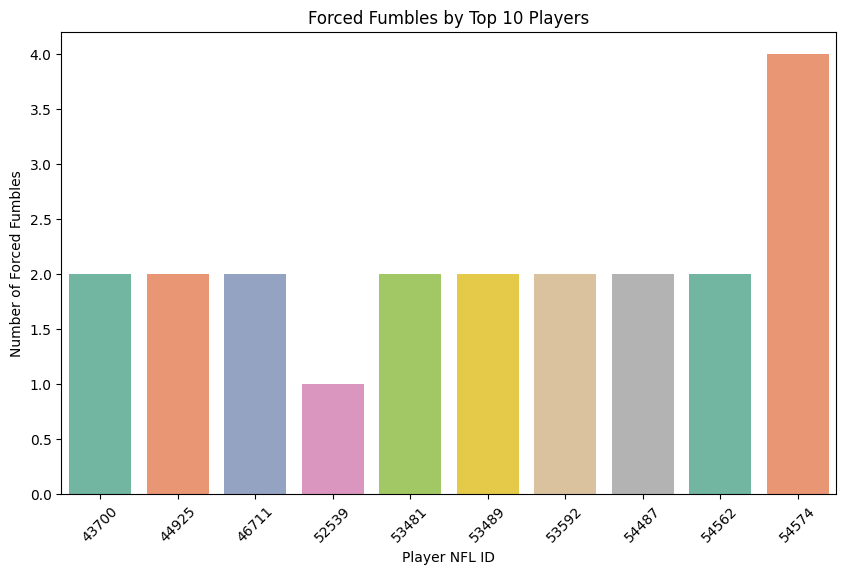

In [25]:
#forced fumbles by players
top_forced_fumblers = tackles[tackles['forcedFumble'] == 1]['nflId'].value_counts().head(10).index

top_forced_fumbles = tackles[tackles['nflId'].isin(top_forced_fumblers) & (tackles['forcedFumble'] == 1)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_forced_fumbles, x='nflId', palette='Set2')
plt.title("Forced Fumbles by Top 10 Players")
plt.xlabel("Player NFL ID")
plt.ylabel("Number of Forced Fumbles")
plt.xticks(rotation=45)
plt.show()


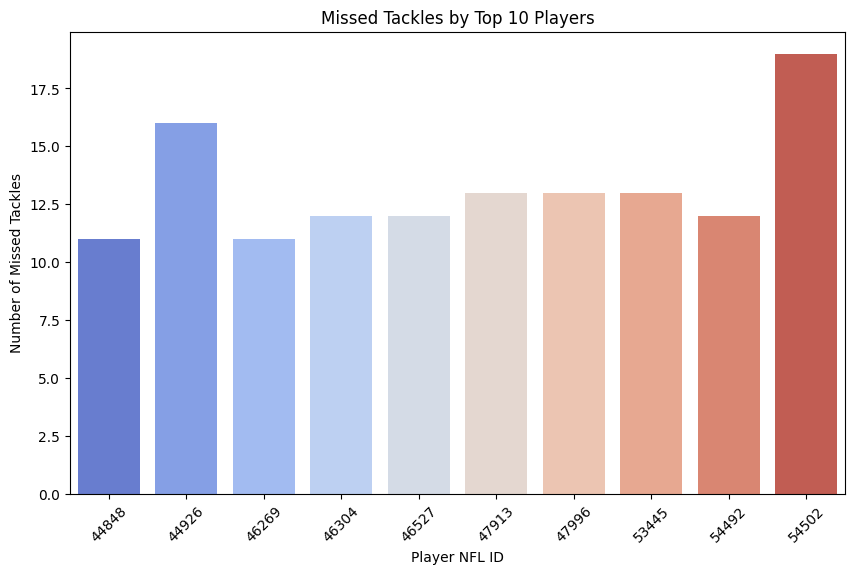

In [26]:
#most missed tackles
top_missed_tacklers = tackles[tackles['pff_missedTackle'] == 1]['nflId'].value_counts().head(10).index

top_missed_tackles = tackles[tackles['nflId'].isin(top_missed_tacklers) & (tackles['pff_missedTackle'] == 1)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_missed_tackles, x='nflId', palette='coolwarm')
plt.title("Missed Tackles by Top 10 Players")
plt.xlabel("Player NFL ID")
plt.ylabel("Number of Missed Tackles")
plt.xticks(rotation=45)
plt.show()


## **Analysing weekly data**

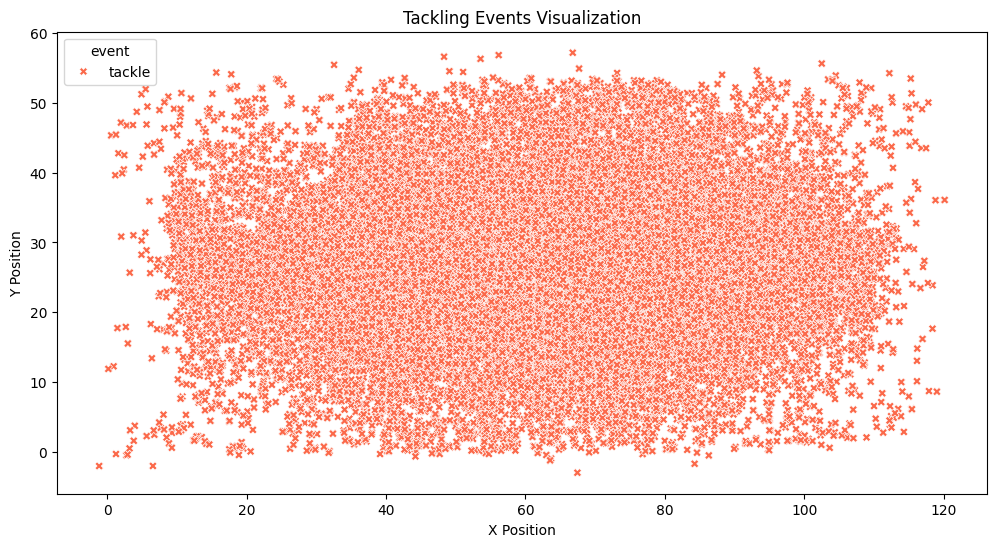

In [27]:
#tackle location on the field
tackling_events = week1[week1['event']=='tackle']

plt.figure(figsize=(12,6))
sns.scatterplot(x='x',y='y', data= tackling_events,hue='event',palette='Reds',marker='X')
plt.title("Tackling Events Visualization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

In [28]:
#tackling speed player wise
import ipywidgets as widgets
def update_speed_plot(select_nfl_id):
  tackling_events = week9[(week9['nflId']==select_nfl_id)& (week9['event']=='tackle')]

  plt.figure(figsize=(10,6))
  sns.violinplot(x='event',y='s',data=tackling_events,palette='Reds',)
  plt.title(f'Tackling Speed Analysis for Player {select_nfl_id}')
  plt.xlabel("Event Type")
  plt.ylabel("Player Speed")
  plt.show()

unique_nfl_id = week9[week9['event']=='tackle']['nflId'].unique()

player_dropdown = widgets.Dropdown(
    options=unique_nfl_id,
    value=unique_nfl_id[0],
    description='Select NFL ID: '
)

output = widgets.interactive_output(update_speed_plot, {'select_nfl_id':player_dropdown})

display(player_dropdown,output)

Dropdown(description='Select NFL ID: ', options=(np.float64(38542.0), np.float64(39984.0), np.float64(42372.0)…

Output()

## **Some more analysis**

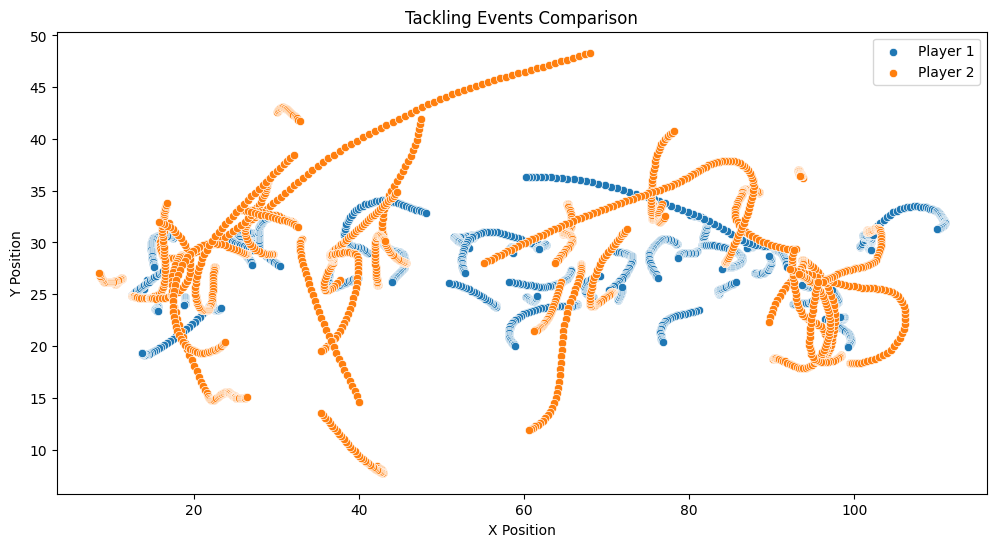

In [29]:
#comparing tackling events for two players
player1_tackles = week3[week3['nflId'] == 25511]
player2_tackles = week3[week3['nflId'] == 35470]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='x', y='y', data=player1_tackles, label='Player 1')
sns.scatterplot(x='x', y='y', data=player2_tackles, label='Player 2')
plt.title("Tackling Events Comparison")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.show()


In [30]:
week5=week5[week5['nflId'] != 'null']
week5 = week5.dropna(subset=['nflId'])

In [31]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 82.2 MB/s eta 0:00:00


In [33]:
import dash
from dash import dcc, html

app = dash.Dash(__name__)
unique_nfl_ids = week5[week5['event'] == 'tackle']['nflId'].unique()
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': str(nfl_id), 'value': nfl_id} for nfl_id in unique_nfl_ids],
        value=unique_nfl_ids[0],
        multi=False
    ),
    dcc.Graph(id='tackling-events-plot')
])

@app.callback(
    dash.dependencies.Output('tackling-events-plot', 'figure'),
    [dash.dependencies.Input('player-dropdown', 'value')]
)
def update_dashboard(selected_nfl_id):
    player_tackles = week5[(week5['nflId'] == selected_nfl_id) & (week5['event'] == 'tackle')]

    figure = {
        'data': [
            {'x': player_tackles['x'], 'y': player_tackles['y'], 'type': 'scatter', 'mode': 'markers', 'name': 'Tackling Events'}
        ],
        'layout': {
            'title': f'Tackling Events for Player {selected_nfl_id}',
            'xaxis': {'title': 'X Position'},
            'yaxis': {'title': 'Y Position'}
        }
    }
    return figure

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>